**Asignatura**: 07MBID Machine Learning

**Profesor**: Félix Fuentes

**Alumna**: Cristina Caro González

#  Práctica 2: Aprendizaje supervisado

Se van a usar los datos de la competición de predicción de los datos del Dengue. Mas información en [enlace](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

**Objetivo**: Utilizar las técnicas de aprendizaje no supervisado para realizar una exploración preliminar de los datos y extraer conclusiones a partir de elementos descartables etc.

**Tecnología**: Python y Google Colab

**Entregable**: Los alumnos trabajarán en Google Colab y entregarán un jupyter notebook (descargadlo como .ipynb para la entrega) describiendo lo siguiente: el problema afrontado, las técnicas utilizadas y su parametrización y los resultados obtenidos incluyendo el usuario de DrivenData utilizado para obtenerlo. Esta memoria contendrá explicaciones sobre los códigos desarrollados.

**Fecha límite**: 21 de noviembre


# Carga de librerías


En primer lugar, procedemos a importar las librerías básicas y de uso general que vamos a tener que usar para realizar la práctica.

Al estar usando Google Colab, no será necesario instalarlas, simplemente tendremos que importarlas usando "import"

Como vemos, hay diferentes tipos de librerías dependiendo de lo que queramos hacer con ellas. Algunas son para visualizaciones, otras para carga de datos, otras para Machine Learning y otras para tratamiento de datasets, por ejemplo. Aunque hay muchas más que no usaremos en esta práctica en concreto.

In [951]:
import numpy as np
import pandas as pd
import time

# plotting libraries
import matplotlib.pyplot as plt
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import seaborn as sns


# machine learning 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score

In [952]:
# Librerías de carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange

# Carga de Datos

A continuación procedemos a cargar los datos dentro del entorno de funcionalidades que nos permite Google Colab.

In [953]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

En primer lugar subimos los datos de entrenamiento sin target.

El fichero en concreto que cargaremos es el llamado: dengue_features_train

In [892]:
# En primer lugar subimos los datos de entrenamiento sin campo objetivo (dengue_features_train)
train_features = upload_files()
train_features.head()

Saving dengue_features_train.csv to dengue_features_train (13).csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [893]:
train_features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


Posteriormente subimos los datos que únicamente nos proporcionan el número de casos de dengue de entrenamiento (dengue_labels_train)

In [894]:
train_labels = upload_files()
train_labels.head()

Saving dengue_labels_train.csv to dengue_labels_train (13).csv
User uploaded file "dengue_labels_train.csv" with length 19582 bytes


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


Mezclamos los dos conjuntos de datos para tenerlos en un único dataframe

In [895]:
train = pd.merge(train_features,train_labels,on=['city', 'year', 'weekofyear'])

train.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Finalmente subimos los datos para generar la evaluación final (dengue_features_test)

In [896]:
test = upload_files()
test.head()

Saving dengue_features_test.csv to dengue_features_test (13).csv
User uploaded file "dengue_features_test.csv" with length 82465 bytes


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


# Preproceso

A continuación llevamos a cabo la parte del preproceso.

Eliminamos la variable week_start_date pues no la vamos a utilizar en nuestro análisis ya que no consideramos que aporte información adicional por criterio experto.

In [897]:
train.drop("week_start_date", axis = 1, inplace = True)
test.drop("week_start_date", axis = 1, inplace = True)
train.head()


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


A continuación voy a realizar un análisis de correlaciones de cada una de las ciudades por separado. De esta forma, podremos ver qué variables están directamente correlacionadas con nuestra variable objetivo y junto con los resultados obtenidos en la práctica 1 podremos decir las variables finales que elegimos para nuestro análisis.

Se puede ver en primer lugar, el mapa de correlaciones para San Juan. Las variables que aparecen más claritas (más rojas) son las que más correlación tienen directamente con la target.

De forma similar, se interpreta el mapa del calor de iquito, en el que salen variables diferentes a las de San Juan.

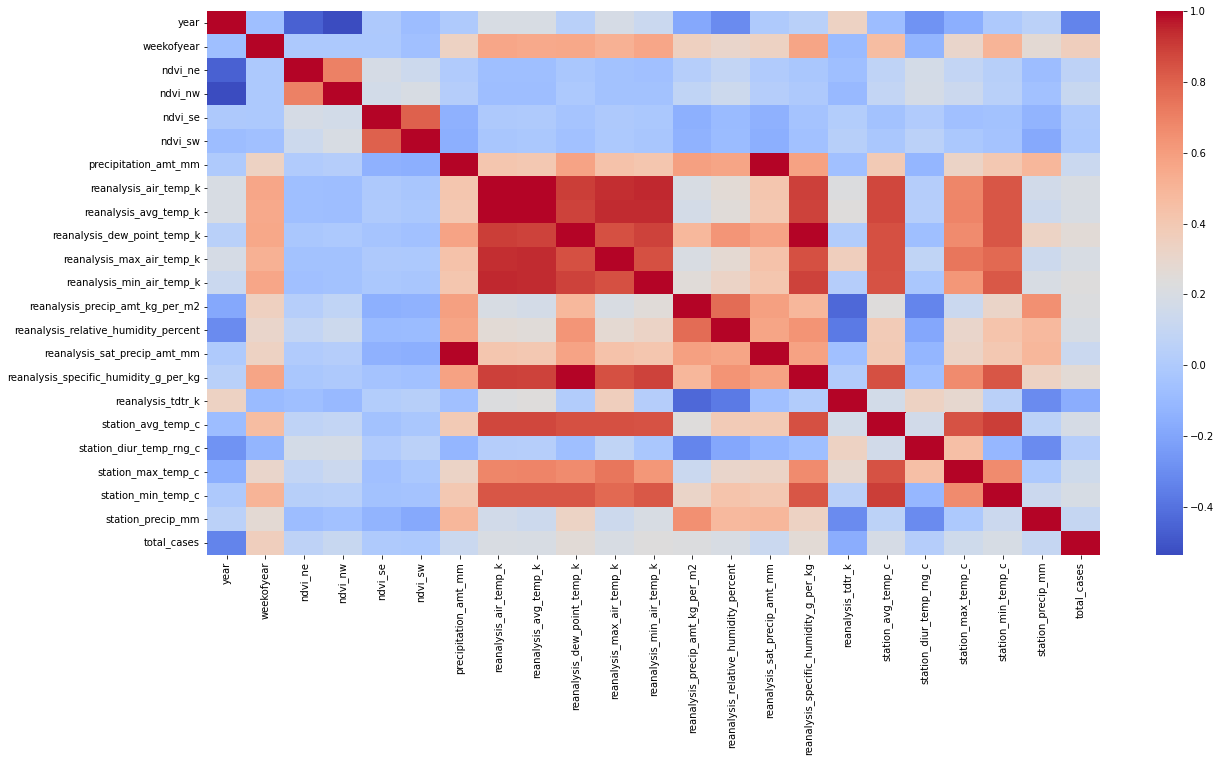

In [898]:
train_corr_sj = train[train['city'] == 'sj'].corr(method='spearman')
train_corr_iq = train[train['city'] == 'iq'].corr(method='spearman')
plt.figure(figsize=(20,10))
sns.heatmap(train_corr_sj, 
            xticklabels=train_corr_sj.columns,
            yticklabels=train_corr_sj.columns,
            cmap="coolwarm")

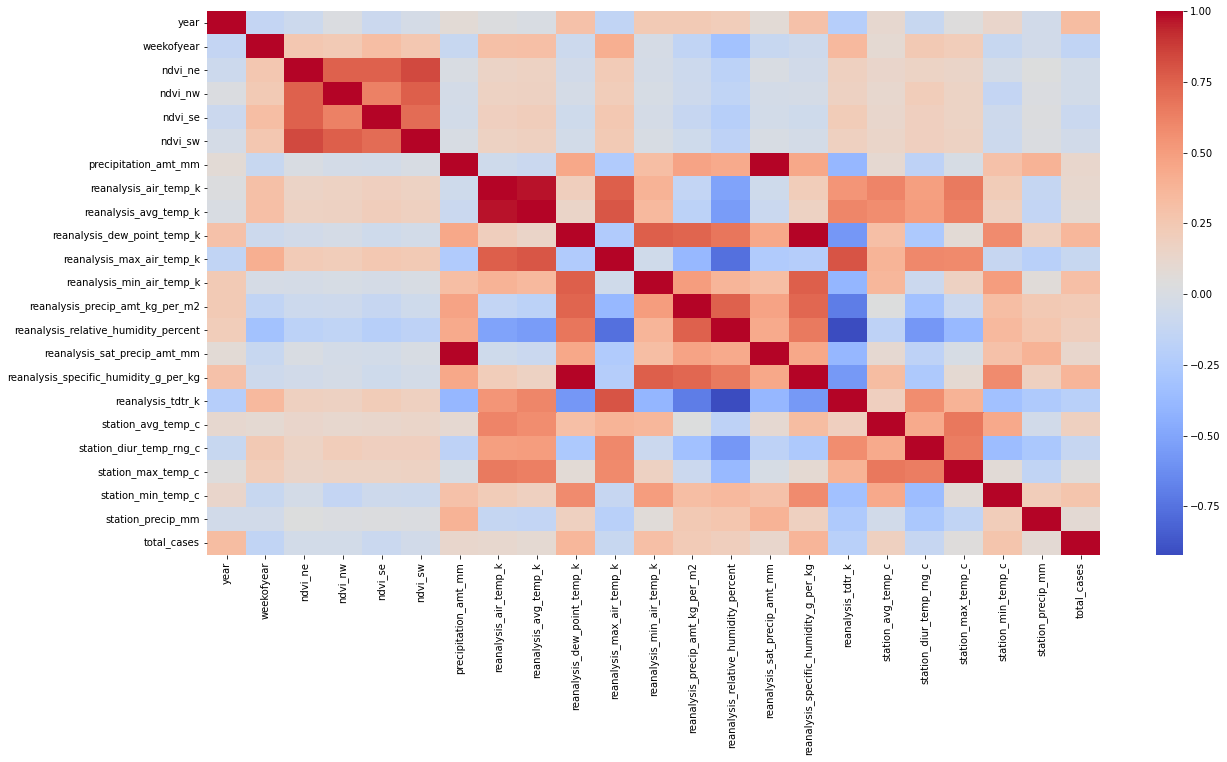

In [899]:
plt.figure(figsize=(20,10))
sns.heatmap(train_corr_iq,
            xticklabels=train_corr_iq.columns,
            yticklabels=train_corr_iq.columns,
            cmap="coolwarm")

A continuación separamos nuestro dataset por las diferentes ciudades y consideramos el conjunto de training y test para probar nuestro modelo posteriormente y testear los resultados.

In [900]:
train_sj = train[train['city'] == 'sj']
train_iq = train[train['city'] == 'iq']
test_sj = test[test['city'] == 'sj']
test_iq = test[test['city'] == 'iq']

Es muy importante resetear los índices para tener un análisis sin errores. A veces, cuando no se resetean los índice puede haber problemas en las predicciones o en la unión de tablas, por lo que decido resetear los índices para evitar problemas futuros.

In [901]:
train_sj=train_sj.reset_index()
train_iq=train_iq.reset_index()
test_sj=test_sj.reset_index()
test_iq=test_iq.reset_index()

Chequeamos los valores nulos, de forma similar a como lo hice en la práctica número 1. Posteriormente pasamos a imputarlos con la mediana. Esta vez he usado una técnica diferente a la usada en la Practica 1 (usé ffill). También he probado a rellenarlos con ffill pero los resultados obtenidos han sido peores por lo que finalmente, he decidido rellenarlos usando el método de la mediana.

In [902]:
pd.isnull(train_sj).sum()

index                                      0
city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

Realizamos lo mismo que anteriormente pero para iquito.

In [903]:
pd.isnull(train_iq).sum()

index                                     0
city                                      0
year                                      0
weekofyear                                0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

Como he mencionado anteriormente, imputo los missings con la mediana. He probado también a rellenarlos con ffill pero los resultados obtenidos no eran tan buenos, por lo que he optado a rellenarlos con la mediana finalmente.

Otra de las consideraciones de por qué rellenarlos con la mediana puede ser una mejor técnica es que si tenemos un outlier y justo después un valor missing, el valor missing sería rellenado por un outlier y queremos evitar este tipo de casos pues nuestros datos quedarían mucho menos alineados con la realidad, ya que podría haber varios missing values seguidos que serían imputados con outliers.

In [904]:
for i in train_sj.columns:
    missing = train_sj[i].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # sólo para las columnas con missing values.
        med = train_sj[i].median()
        train_sj[i] = train_sj[i].fillna(med)

pd.isnull(train_sj).any()

index                                    False
city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

Tras imputar los valores missings, vemos que ya no tenemos ningún valor missing en nuestros datasets. Lo tenemos que aplicar tanto a los datasets de training como a los datasets de test.

In [905]:
for i in train_iq.columns:
    missing = train_iq[i].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # sólo para las columnas con missing values.
        med = train_iq[i].median()
        train_iq[i] = train_iq[i].fillna(med)

pd.isnull(train_iq).any()

index                                    False
city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [906]:
for i in test_sj.columns:
    missing = test_sj[i].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # sólo para las columnas con missing values.
        med = test_sj[i].median()
        test_sj[i] = test_sj[i].fillna(med)

pd.isnull(test_sj).any()

index                                    False
city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [907]:
for i in test_iq.columns:
    missing = test_iq[i].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # sólo para las columnas con missing values.
        med = test_iq[i].median()
        test_iq[i] = test_iq[i].fillna(med)

pd.isnull(test_iq).any()

index                                    False
city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [908]:
for i in test_iq.columns:
    missing = test_iq[i].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # sólo para las columnas con missing values.
        med = test_iq[i].median()
        test_iq[i] = test_iq[i].fillna(med)

pd.isnull(test_iq).any()

index                                    False
city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

A continuación muestro el dataset de training de San Juan

In [909]:
train_sj

,index,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,sj,2008,13,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,932,sj,2008,14,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,933,sj,2008,15,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,934,sj,2008,16,0.001800,0.068075,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3


A continuación llega el momento de la selección de variables para poder llevar a cabo nuestros modelos de ML. Para considerar estas variables he tenido en cuenta los resultados obtenidos en la práctica 1 y además la matriz de correlaciones que he hecho anteriormente. La matriz de correlaciones que se ha realizado anteriormente por separada nos brinda mucha información adicional, ya que se realiza la correlación con el número total de casos y podemos ver qué variables están más correlacionadas con nuestra target.

Tras tener en cuenta diferentes criterios, se puede ver fácilmente que en la matriz de correlación, las variables que están más correlacionadas con el número de casos para San Juan son:

- Reanalysis_dew_point_temp_k
- Reanalysis_specific_humidity_g_per_kg
- station_avg_temp_c
- station_min_temp_c

En la matriz anterior de San Juan se puede ver perfectamente que estas variables son las que más relación guardan con la variable target y además también tienen sentido con los resultados obtenidos en la práctica 1 a través de los métodos de selección de variables.

In [910]:
selected_features_sj = ['reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg',
                 'station_avg_temp_c', 'station_min_temp_c']
                 

'''['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 'station_min_temp_c']'''

'''['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 
                 'station_avg_temp_c','reanalysis_relative_humidity_percent', 'precipitation_amt_mm']'''
                 


"['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', \n                 'station_avg_temp_c','reanalysis_relative_humidity_percent', 'precipitation_amt_mm']"

In [911]:
F_train_sj=train_sj[selected_features_sj]
F_test_sj=test_sj[selected_features_sj]

Normalizamos el dataset de San Juan tras filtrar solo las variables elegidas anteriormente

In [912]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
cols_train_sj= F_train_sj.columns
cols_test_sj= F_test_sj.columns

scaler = MinMaxScaler()
X_train_sj = scaler.fit_transform(F_train_sj)
X_test_sj = scaler.transform(F_test_sj)
X_train_sj = pd.DataFrame(X_train_sj, columns=cols_train_sj)
X_test_sj = pd.DataFrame(X_test_sj, columns=cols_test_sj)
#y_train_sj = train_sj['total_cases']
X_train_sj=pd.concat([X_train_sj, train_sj['total_cases']], axis=1,)
X_train_sj

,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_min_temp_c,total_cases
0,0.339933,0.297392,0.359684,0.282051,4
1,0.528474,0.473460,0.535573,0.564103,5
2,0.710356,0.664509,0.535573,0.641026,4
3,0.695111,0.641761,0.640316,0.705128,3
4,0.757841,0.711300,0.843874,0.782051,6
...,...,...,...,...,...
931,0.300859,0.249676,0.304348,0.423077,4
932,0.440687,0.381542,0.470356,0.564103,3
933,0.379008,0.319586,0.298419,0.500000,1
934,0.322762,0.277418,0.341897,0.500000,3


De forma similar, procedemos a realizar el análisis de las variables de iquito.
Las siguientes variables también se pueden ver, facilmente en el mapa de correlaciones anterior, que están bastante correlacionadas con la variable target. Además, si unimos nuestra matriz de correlación anterior con las conclusiones extraidas de la práctica 1, obtenemos las variables que se muestran a continuación.

Además, también se han probado con diferentes grupos de variables, combinandolas con los resultados obtenidos en la práctica 1 pero tras analizarlo con la matriz de correlación anterior, los mejores resultados se muestran a continuación

In [913]:
selected_features_iq = ['reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_c' ]

'''['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 'station_min_temp_c']'''

F_train_iq=train_iq[selected_features_iq]
F_test_iq=test_iq[selected_features_iq]

In [914]:
cols_train_iq= F_train_iq.columns
cols_test_iq= F_test_iq.columns

scaler = MinMaxScaler()
X_train_iq = scaler.fit_transform(F_train_iq)
X_test_iq = scaler.transform(F_test_iq)
X_train_iq = pd.DataFrame(X_train_iq, columns=cols_train_iq)
X_test_iq = pd.DataFrame(X_test_iq, columns=cols_test_iq)
#y_train_iq = train_sj['total_cases']
X_train_iq=pd.concat([X_train_iq, train_iq['total_cases']], axis=1,)
X_train_iq

,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_specific_humidity_g_per_kg,station_min_temp_c,total_cases
0,0.609431,0.681319,0.543713,0.631579,0
1,0.630275,0.461538,0.569033,0.642105,0
2,0.661883,0.626374,0.599829,0.631579,0
3,0.323936,0.186813,0.277844,0.000000,0
4,0.462669,0.505495,0.399145,0.463158,0
...,...,...,...,...,...
515,0.805741,0.835165,0.763388,0.810526,5
516,0.761148,0.549451,0.713601,0.736842,8
517,0.647360,0.604396,0.586484,0.473684,1
518,0.626175,0.549451,0.563388,0.663158,1


A continuación cargamos todos los modelos que queremos probar. Lo mejor es ir probando de modelos más sencillos a más complejos para ver cómo es la evolución de los diferentes resultados que obtenemos.

En mi caso, tras probar con todos ellos, el que mejor me salía eran las regresiones lineales por lo que en la evaluación final solo he dejado este modelo para reducir el tiempo de ejecución y de testeo, ya que al ejecutar todos, el tiempo de ejecución es muy grande.

In [915]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

from sklearn.linear_model import LinearRegression
lr = Pipeline(steps=[("lr",LinearRegression())
                          ]
                   )

from sklearn.linear_model import Ridge
ridge = Pipeline(steps=[
                            ("ridge",Ridge())
                          ]
                   )

from sklearn.linear_model import Lasso
lasso = Pipeline(steps=[
                            ("lasso",Lasso())
                          ]
                   )

from sklearn.linear_model import ElasticNet
en = Pipeline(steps=[
                            ("en",ElasticNet())
                          ]
                   )

from sklearn.neighbors import KNeighborsRegressor
knr = Pipeline(steps=[
                            ("knr",KNeighborsRegressor())
                          ]
                   )

from sklearn.neighbors import RadiusNeighborsRegressor
rnr = Pipeline(steps=[
                            ("rnr",RadiusNeighborsRegressor())
                          ]
                   )

from sklearn.svm import SVR
svr = Pipeline(steps=[
                            ("svr",SVR())
                          ]
                   )

from sklearn.svm import LinearSVR
lsvr= Pipeline(steps=[
                            ("lsvr",LinearSVR())
                          ]
                   )

A continuación cargamos el Grid. En el grid tenemos que poner todos los hiperparámetros que queremos probar. En mi caso, he puesto un rango bastante amplio de hiperparámetros pero tras probar, he visto que el modelo que mejores resultados me salía era la regresión lineal, por lo que finalmente solo he ejecutado la regresión lineal y sus variaciones de lasso y ridge (que previenen overfitting).

In [916]:
grid_lsvr={"lsvr__tol":[0.001,0.0001], "lsvr__C": [0.1, 5.0, 50.0]}


grid_dtr = {"max_depth":list(range(3,20)) # Profundidades de 1 a 10
              }

grid_rfr = {"n_estimators": [20,30,70,80,100], 
                     
                     "max_depth": [10,15,20,50,80,120], 
                      
                     "max_features": ["sqrt", 3, 4] 
                     }


grid_gbr = {"loss": ["ls"],
                          "learning_rate": [0.05, 0.8, 0.1,1.0, 0.9], 
                          
                          "n_estimators": [3,5,10,12,15,20,25,40,30,50,60,70,80,90, 100], 
                          
                          "max_depth": [20,25,30,50,60,70,80], 
                          
                          "subsample": [0.8, 0.5, 1], 
                          
                          "max_features": ["sqrt", 5, 10,3, 15,20], 
                          }


grid_ridge= {'ridge__alpha': [1, 0.1, 0.01, 0.001,0.05,0.5,2,5,10,6,7,8,9]}
grid_lasso= {'lasso__alpha': [1, 0.1, 0.01, 0.001,0.05,0.5,2,5,10,6,7,8,9]}
grid_en ={'en__alpha': [1, 0.1, 0.01, 0.001,0.05,0.5],
          'en__l1_ratio': [1, 0.1, 0.01, 0.001]}


grid_knr = {"knr__n_neighbors": [3,5,7,9,11,13,15], 
                  "knr__weights": ["uniform","distance"]  
                  }

grid_rnr={'rnr__weights': ["uniform","distance"],
          'rnr__radius': [1, 0.1, 1.5]}


grid_svr={"svr__C": [1.0, 5.0],
            "svr__kernel": ["poly"],
            "svr__gamma": [0.001, 1, 10.0]
           }

A continuación llamamos al grid search. Es decir, vamos a buscar todos los hiperparametros que hemos metido antes en los diferentes modelos, también aplicando k folds con 10 folds y teniendo el MAE como métrica de scoring)

In [917]:
from sklearn.model_selection import GridSearchCV

gs_lsvr=GridSearchCV(lsvr,
                    grid_lsvr,
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

gs_lr=GridSearchCV(lr,
                    param_grid={},
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

gs_dtr= GridSearchCV(dtr, 
                    grid_dtr, 
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

gs_rfr= GridSearchCV(rfr, 
                    grid_rfr, 
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

gs_gbr= GridSearchCV(gbr, 
                    grid_gbr, 
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

gs_ridge= GridSearchCV(ridge, 
                    grid_ridge, 
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

gs_lasso= GridSearchCV(lasso, 
                    grid_lasso, 
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

gs_en= GridSearchCV(en, 
                    grid_en, 
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

gs_knr= GridSearchCV(knr, 
                    grid_knr, 
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

gs_rnr= GridSearchCV(rnr, 
                    grid_rnr, 
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

gs_svr= GridSearchCV(svr, 
                    grid_svr, 
                    cv=10, 
                    scoring="neg_mean_absolute_error", 
                    verbose=1, 
                    n_jobs=-1)

Como he mencionado anteriormente, ya que el tiempo de ejecución es muy grande, al ver en la primera ejecución que los mejores resultados son obtenidos con una regresión lineal, quedo con solo probar ese modelo en adelante para reducir el tiempo de ejecución.

Probé a ejecutar también con decision tree, random forest, gradient boosting, etc. pero con el que mejor resultados obtenia era la regresión lineal.

In [918]:
'''todos_los_grid_searchs_r = {"gs_lr": gs_lr,
                            "gs_dtr":gs_dtr,
                          "gs_rfr":gs_rfr,
                          "gs_gbr":gs_gbr,
                          "gs_ridge":gs_ridge,
                          "gs_lasso":gs_lasso,
                          "gs_en":gs_en,
                          "gs_knr":gs_knr,
                          "gs_rnr":gs_rnr,
                          "gs_svr":gs_svr,
                          "gs_lsvr": gs_lsvr,
                           }
                           '''

todos_los_grid_searchs_r = {"gs_lr": gs_lr,
                          "gs_ridge":gs_ridge,
                          "gs_lasso":gs_lasso,
                           }

Ejecutamos San Juan en primer lugar. Entrenamos nuestro modelo con el .fit 

In [919]:
from sklearn.model_selection import train_test_split
sj_train_X, sj_test_X, sj_train_y, sj_test_y = train_test_split(
                                        X_train_sj.drop(columns = "total_cases"),
                                        X_train_sj['total_cases'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

In [920]:
sj_train_X.reset_index(drop = True, inplace = True)
sj_test_X.reset_index(drop = True, inplace = True)
sj_train_y.reset_index(drop = True, inplace = True)
sj_test_y.reset_index(drop = True, inplace = True)

In [921]:
for nombre, grid_search in todos_los_grid_searchs_r.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(sj_train_X, sj_train_y)

Haciendo Grid Search de gs_lr...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Haciendo Grid Search de gs_ridge...
Fitting 10 folds for each of 13 candidates, totalling 130 fits
Haciendo Grid Search de gs_lasso...
Fitting 10 folds for each of 13 candidates, totalling 130 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.519e+05, tolerance: 1.697e+02



Después de entrenar nuestro modelo con .fit vemos el modelo que mejor score ha obtenido. En este caso es el modelo de regresión de lineal

In [922]:
mejor_score_de_cada_gridsearch_reg_sj = [(nombre_modelo, grid_search.best_score_) # Generamos una tupla
                                  for nombre_modelo, grid_search           # por cada par clave-valor
                                  in todos_los_grid_searchs_r.items()]       # del diccionario

mejor_score_de_cada_gridsearch_reg_sj

[('gs_lr', -26.075010001425632),
 ('gs_ridge', -26.076182340521406),
 ('gs_lasso', -26.078537270024178)]

In [923]:
mejor_score_de_cada_gridsearch_df_r_sj = pd.DataFrame(mejor_score_de_cada_gridsearch_reg_sj,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_score_de_cada_gridsearch_df_ordenado_r_sj = (mejor_score_de_cada_gridsearch_df_r_sj
                                              .sort_values(by="Mejor score", ascending=False)
                                             )

mejor_score_de_cada_gridsearch_df_ordenado_r_sj

,GridSearchCV,Mejor score
0,gs_lr,-26.075010
1,gs_ridge,-26.076182
2,gs_lasso,-26.078537


In [924]:
mejor_gridsearch_r_sj = todos_los_grid_searchs_r["gs_lr"]

In [925]:
mejor_gridsearch_r_sj

GridSearchCV(cv=10, estimator=Pipeline(steps=[('lr', LinearRegression())]),
             n_jobs=-1, param_grid={}, scoring='neg_mean_absolute_error',
             verbose=1)

In [926]:
mejor_pipeline_r_sj = mejor_gridsearch_r_sj.best_estimator_

mejor_pipeline_r_sj.get_params()

{'lr': LinearRegression(),
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__normalize': 'deprecated',
 'lr__positive': False,
 'memory': None,
 'steps': [('lr', LinearRegression())],
 'verbose': False}

In [927]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=sj_test_y,
                         y_pred=mejor_pipeline_r_sj.predict(sj_test_X))

mae = mean_absolute_error(y_true=sj_test_y,
                         y_pred=mejor_pipeline_r_sj.predict(sj_test_X))

rmse = np.sqrt(mse)


Realizamos la predicción a continuación para San Juan

In [928]:
predic_sj=mejor_pipeline_r_sj.predict(sj_test_X)

Calculamos las métricas de error

In [929]:
print("MSE: " + str(mse))
print("MAE: " +  str(mae))
print("RMSE: " +  str(rmse))

MSE: 3199.316100463813
MAE: 30.682594732984818
RMSE: 56.56249729691762


A continuación visualizamos las predicciones

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



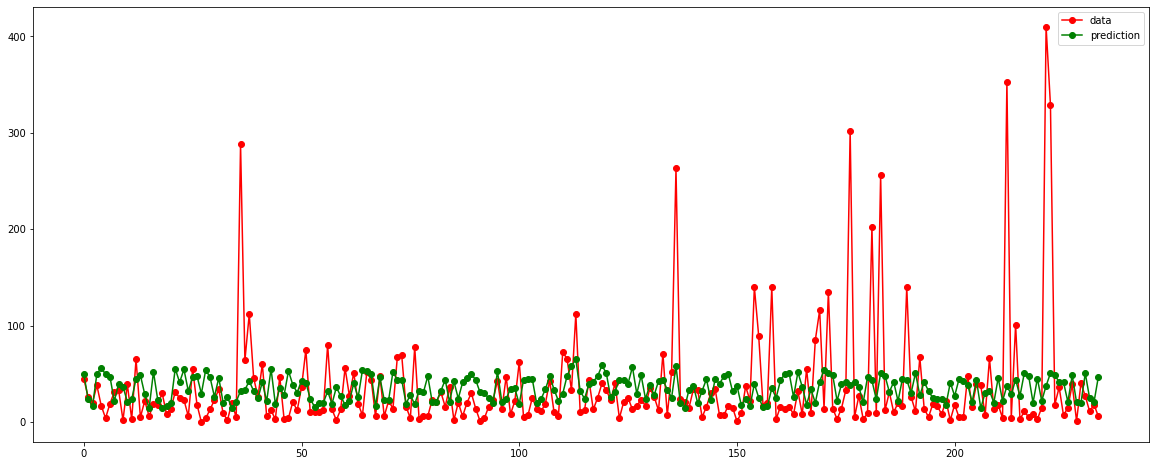

In [930]:
import numpy as np
plt.figure(figsize=(20,8))
xx = np.stack(i for i in range(sj_test_y.shape[0]))
plt.plot(xx, sj_test_y, c='r', label='data',marker='o')
plt.plot(xx, predic_sj, c='g', label='prediction',marker='o')
plt.axis('tight')
plt.legend()


plt.show()

Ahora, vamos a proceder a hacer lo mismo que hicimos para San Juan pero en este caso para iquito

In [931]:
from sklearn.model_selection import train_test_split
iq_train_X, iq_test_X, iq_train_y, iq_test_y = train_test_split(
                                        X_train_iq.drop(columns = "total_cases"),
                                        X_train_iq['total_cases'],
                                        test_size=0.25,
                                        random_state = 123
                                    )

In [932]:
iq_train_X.reset_index(drop = True, inplace = True)
iq_test_X.reset_index(drop = True, inplace = True)
iq_train_y.reset_index(drop = True, inplace = True)
iq_test_y.reset_index(drop = True, inplace = True)

Entrenamos nuestros modelos

In [933]:
for nombre, grid_search in todos_los_grid_searchs_r.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(iq_train_X, iq_train_y)

Haciendo Grid Search de gs_lr...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Haciendo Grid Search de gs_ridge...
Fitting 10 folds for each of 13 candidates, totalling 130 fits
Haciendo Grid Search de gs_lasso...
Fitting 10 folds for each of 13 candidates, totalling 130 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.430e+02, tolerance: 5.367e+00



In [934]:
mejor_score_de_cada_gridsearch_reg_iq = [(nombre_modelo, grid_search.best_score_) # Generamos una tupla
                                  for nombre_modelo, grid_search           # por cada par clave-valor
                                  in todos_los_grid_searchs_r.items()]       # del diccionario

mejor_score_de_cada_gridsearch_reg_iq

[('gs_lr', -6.937078136340024),
 ('gs_ridge', -6.936593738949571),
 ('gs_lasso', -6.944185539922692)]

In [935]:
mejor_score_de_cada_gridsearch_df_r_iq = pd.DataFrame(mejor_score_de_cada_gridsearch_reg_iq,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_score_de_cada_gridsearch_df_ordenado_r_iq = (mejor_score_de_cada_gridsearch_df_r_iq
                                              .sort_values(by="Mejor score", ascending=False)
                                             )

mejor_score_de_cada_gridsearch_df_ordenado_r_iq

,GridSearchCV,Mejor score
1,gs_ridge,-6.936594
0,gs_lr,-6.937078
2,gs_lasso,-6.944186


En este caso el mejor modelo obtenido es el de ridge

In [936]:
mejor_gridsearch_r_iq = todos_los_grid_searchs_r["gs_ridge"]

In [937]:
mejor_gridsearch_r_iq

GridSearchCV(cv=10, estimator=Pipeline(steps=[('ridge', Ridge())]), n_jobs=-1,
             param_grid={'ridge__alpha': [1, 0.1, 0.01, 0.001, 0.05, 0.5, 2, 5,
                                          10, 6, 7, 8, 9]},
             scoring='neg_mean_absolute_error', verbose=1)

In [938]:
mejor_pipeline_r_iq = mejor_gridsearch_r_iq.best_estimator_

mejor_pipeline_r_iq.get_params()

{'memory': None,
 'ridge': Ridge(alpha=10),
 'ridge__alpha': 10,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': 'deprecated',
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001,
 'steps': [('ridge', Ridge(alpha=10))],
 'verbose': False}

In [939]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=iq_test_y,
                         y_pred=mejor_pipeline_r_iq.predict(iq_test_X))

mae = mean_absolute_error(y_true=iq_test_y,
                         y_pred=mejor_pipeline_r_iq.predict(iq_test_X))

rmse = np.sqrt(mse)

Realizamos la predicción

In [940]:
predic_iq=mejor_pipeline_r_iq.predict(iq_test_X)

Calculamos los errores

In [941]:
print("MSE: " + str(mse))
print("MAE: " +  str(mae))
print("RMSE: " +  str(rmse))

MSE: 45.63408340601492
MAE: 5.382982432034935
RMSE: 6.755300393469925


Visualizamos las predicciones obtenidas al igual que hicimos con San Juan

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



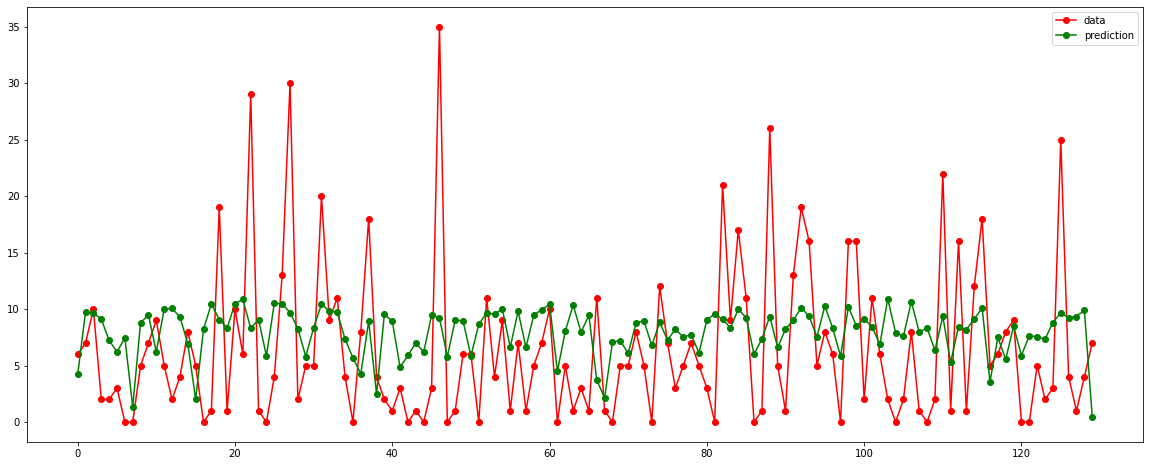

In [942]:
import numpy as np
plt.figure(figsize=(20,8))
xx = np.stack(i for i in range(iq_test_y.shape[0]))
plt.plot(xx, iq_test_y, c='r', label='data',marker='o')
plt.plot(xx, predic_iq, c='g', label='prediction',marker='o')
plt.axis('tight')
plt.legend()
plt.show()

Procedemos a general el resultado final para ponerlo todo en un mismo excel y poder subirlo a la plataforma de DrivenData

In [943]:
predic_iq = mejor_pipeline_r_iq.predict(iq_test_X)
y_pred_iq = mejor_pipeline_r_iq.predict(X_test_iq)

In [944]:
y_pred_sj = mejor_pipeline_r_sj.predict(X_test_sj)
y_pred_iq = mejor_pipeline_r_iq.predict(X_test_iq)

In [945]:
y_pred = np.concatenate((y_pred_sj,y_pred_iq), axis = 0)
y_pred.shape

(416,)

In [946]:
# round the result and cast to int
import numpy as np
y = np.rint(y_pred) # round
y = y.astype(int) # cast to int
res = np.hstack(y)

res.shape

(416,)

In [947]:
y_pred_no_neg = res.copy()

In [948]:
y_pred_no_neg.shape

(416,)

Si hay alguna predicción menor a 0 dejamos el valor 0 pues no es posible que sea menor a 0

In [949]:
y_pred_no_neg[y_pred < 0] = 0
y_pred_no_neg

array([28, 24, 35, 26, 30, 29, 33, 41, 43, 39, 35, 36, 44, 41, 51, 51, 52,
       56, 64, 60, 50, 46, 57, 41, 42, 37, 33, 40, 37, 34, 27, 17, 17, 25,
       22, 36, 21, 20, 22, 26, 18, 16, 15, 18, 18, 21, 17, 19, 19, 18, 19,
       23, 24, 20, 25, 25, 41, 36, 34, 38, 39, 43, 47, 46, 51, 53, 45, 45,
       46, 51, 52, 53, 48, 47, 52, 52, 55, 53, 44, 36, 41, 43, 44, 31, 32,
       31, 28, 36, 29, 26, 23, 23, 20, 23, 28, 28, 40, 35, 32, 42, 31, 30,
       25, 31, 48, 48, 34, 39, 46, 59, 55, 49, 49, 52, 57, 63, 54, 53, 53,
       60, 54, 59, 61, 60, 58, 53, 49, 53, 58, 46, 39, 44, 46, 31, 22, 23,
       26, 26, 22, 11, 14, 21, 19, 20, 15, 17, 16, 14, 12, 16, 16, 14, 22,
       28, 16, 17, 18, 22, 16, 34, 39, 41, 44, 58, 56, 51, 46, 47, 42, 49,
       44, 57, 52, 53, 51, 44, 49, 43, 47, 53, 42, 41, 32, 45, 38, 36, 32,
       29, 23, 24, 15, 16, 20, 17, 13, 13, 11, 13, 15, 14, 16, 16, 12, 14,
       16, 21, 22, 21, 27, 30, 25, 38, 33, 26, 42, 39, 41, 46, 42, 44, 43,
       44, 41, 45, 53, 45

A continuación obtenemos nuestro fichero final, que subimos a Driven Data

In [950]:
# generate output
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 
                       'total_cases': y_pred_no_neg})


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,city,year,weekofyear,total_cases
0,sj,2008,18,28
1,sj,2008,19,24
2,sj,2008,20,35
3,sj,2008,21,26
4,sj,2008,22,30


A continuación podemos ver que el resultado obtenido en DrivenData para DengAI: Predicting Disease Spread es de MAE 25.9519

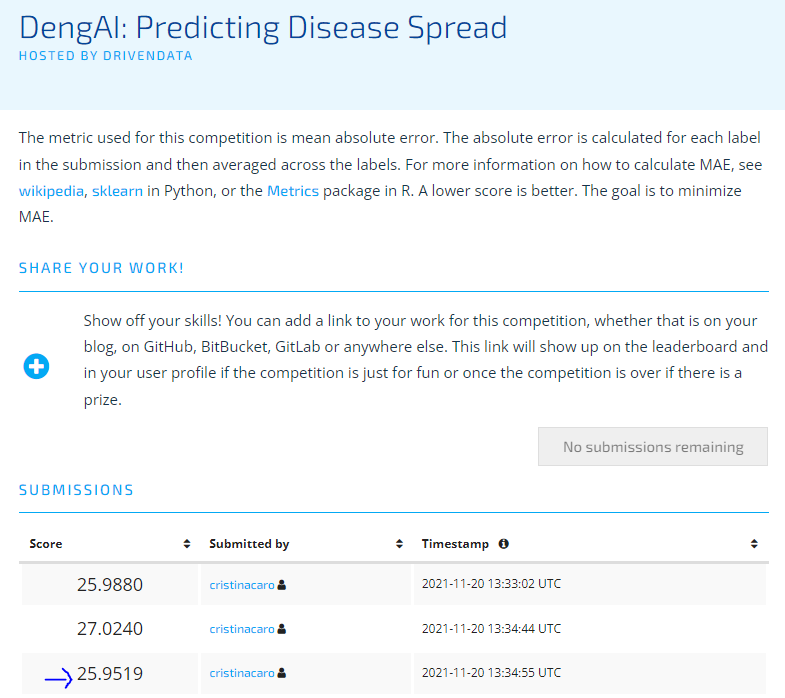